In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 머신러닝
1. 지도학습 - 예측대상이 있는 알고리즘
- y가 연속값: 회귀 알고리즘
- y가 불연속값: 분류알고리즘

2. 비지도학습 - 예측대상이 없는 알고리즘
-  

In [2]:
#코랩으로 할때
# from google.colab import drive
# drive.mount('./content/drive')

In [3]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### 1. 데이터 전처리 - nan값 처리, 칼럼 데이터타입 등..

### 2. EDA 데이터 탐색 - 시각화, 데이터분석

### 3. 
target 데이터 = y로 설정
조건데이터 => x

In [5]:
y = df.Price
x = df.drop(['Price', 'Address'], axis = 1)

### 4. 데이터 나누기

In [6]:
thresh = len(y) * 0.8

In [7]:
X_train = x.iloc[:4000, :]
X_test = x.iloc[4000:, :]

y_train = y.iloc[:4000]
y_test = y.iloc[4000:]

In [8]:
# 회귀알고리즘 import => sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train) #알고리즘 학습 후 나온 모델을 알고리즘 이라고 함

LinearRegression()

### 5.모델 평가 (예측)
-> 모델에게 새로운 데이터를 예측시키고, 에측결과를 실제 값과 비교한다.

In [12]:
preds = lr.predict(X_test)

### 6. 시각화

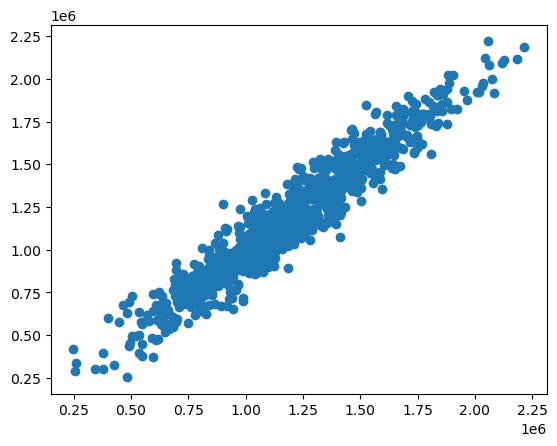

In [13]:
plt.scatter(preds, y_test)

In [14]:
## 7. 검증지표 

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
print('MSE : ', mean_squared_error(y_test, preds))
print('MAE : ', mean_absolute_error(y_test, preds))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, preds)))
print('r2_score : ', r2_score(y_test, preds))

MSE :  10415367207.049421
MAE :  81428.59816693324
RMSE :  102055.70639140872
r2_score :  0.9138111758689369


In [19]:
#mse 직접계산해보기
(y_test - preds).apply(lambda x: x**2).mean()

10415367207.049421

In [22]:
# 계수
lr.coef_ #회귀계수값

array([2.16552703e+01, 1.65182806e+05, 1.21190394e+05, 1.01053408e+03,
       1.51223654e+01])

In [23]:
# 절편
lr.intercept_ #계수값

-2637246.108216885